In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random

## 1. 대수의 법칙 ##

In [35]:
# (1) 주사위 던지는 함수 구현, 10번 던진 결과값을 print

def throw_dice(num):
    
    vals=[]
    for i in range(num):
        tmp=random.randint(1,6)
        vals.append(tmp)
    
    return vals
    
print(throw_dice(num=10))

[2, 5, 3, 6, 6, 3, 1, 4, 6, 4]


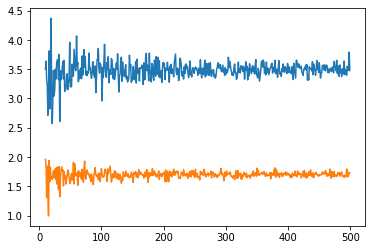

In [37]:
# (2) 주사위를 여러번 던졌을 때, 눈들의 평균값 및 표준편차의 추이


num_max = 500
nums = list(range(10, num_max))

y_list_1=[]
y_list_2=[]
for i in nums:
    li=throw_dice(i)
    y_list_1.append(np.mean(li))
    y_list_2.append(np.std(li))
plt.plot(nums,y_list_1)
plt.plot(nums,y_list_2)

plt.show()


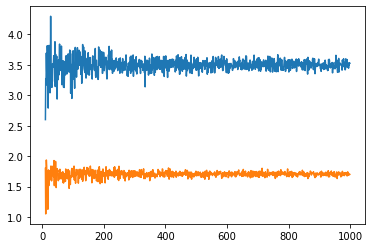

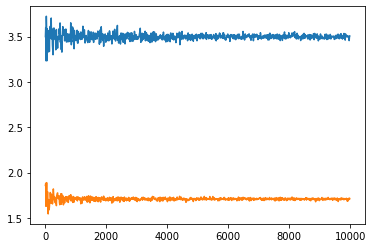

In [39]:
# (3) 주사위를 1000번, 10000번 던졌을 때는?

num_max = 1000
nums = list(range(10, num_max, 1))

y_list_1=[]
y_list_2=[]

for i in nums:
    li=throw_dice(i)
    y_list_1.append(np.mean(li))
    y_list_2.append(np.std(li))

plt.figure(0)

plt.plot(nums,y_list_1)
plt.plot(nums,y_list_2)


plt.show()


num_max = 10000
nums = list(range(10, num_max, 10))

y_list_3=[]
y_list_4=[]

for i in nums:
    li=throw_dice(i)
    y_list_3.append(np.mean(li))
    y_list_4.append(np.std(li))


plt.figure(1)

plt.plot(nums,y_list_3)
plt.plot(nums,y_list_4)

plt.show()



## 2. 원주율 구하기 ##

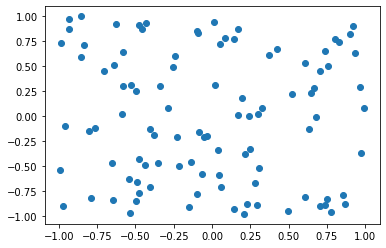

In [127]:
# (1) x,y~[-1,1] 평면상에 임의의 점을 생성하는 함수 구현, scatter 함수로 시각화

def xy_rand(num):
    x=np.random.uniform(low=-1.0,high=1.0,size=num)
    y=np.random.uniform(low=-1.0,high=1.0,size=num)
    
    return x,y

num = 100
x, y = xy_rand(num)

plt.scatter(x,y)

plt.show()

In [134]:
# (2) 생성된 x,y 점들에 대해서 개별 점들 중, 단위 원 x^2+y^2=1 안에 있는 점들의 비율을 계산 후, 원주율을 근사
num = 100
x, y = xy_rand(num)

count=0
for i in range(num):
    tmp_x=x[i]
    tmp_y=y[i]
    c=tmp_x*tmp_x+tmp_y*tmp_y
    if c<1: count+=1


pi_approx = count/num*4
print(pi_approx)


3.16


In [151]:
# (3) 생성된 점의 개수를 100개에서 10000개, 20000개를 늘렸을 때 원주율의 값은?

num = 10000
x, y = xy_rand(num)

count=0
for i in range(num):
    tmp_x=x[i]
    tmp_y=y[i]
    c=tmp_x*tmp_x+tmp_y*tmp_y
    if c<1: count+=1


pi_approx = count/num*4
print(pi_approx)


num = 20000
x, y = xy_rand(num)

count=0
for i in range(num):
    tmp_x=x[i]
    tmp_y=y[i]
    c=tmp_x*tmp_x+tmp_y*tmp_y
    if c<1: count+=1


pi_approx = count/num*4
print(pi_approx)

3.1704
3.1466


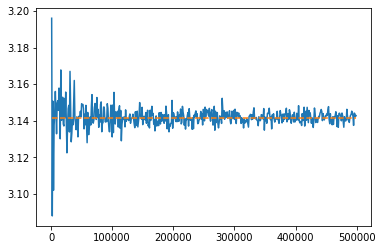

In [152]:
# (4) range(1000, 500000, 1000)에 대해서 추정된 원주율 값의 추이를 그리면?, 실제 pi값 (np.pi)를 그래프에 점선으로 그려서 표시
# 조금 기다리면 정상적으로 수행됩니다.
nums = list(range(1000, 500000, 1000))
pi_x = []
for i in nums:
    x, y = xy_rand(i)
    count=0
    for j in range(i):
        tmp_x=x[j]
        tmp_y=y[j]
        c=tmp_x*tmp_x+tmp_y*tmp_y
        if c<1: count+=1


    pi_approx = count/i*4

    pi_x.append(pi_approx)

plt.plot(nums,pi_x)
y_line=np.array([np.pi]*499)
plt.plot(nums,y_line,linestyle="--")
plt.show()


## 3. 몬티 홀 문제와 조건부 확률 ##

In [88]:
# (1) 몬티 홀 문제 시행 구현하기

def monty_hall_trial(change_choice=False, doors=['car','goat','goat']):
    # 무작위로 주어진 선택지(doors)를 섞는다
    door_numpy=np.array(doors)
    np.random.shuffle(door_numpy)
    
   # 참가자는 무작위로 문을 하나 선택한다
    choice_list=[i for i in range(len(doors))]
    choice=random.choice(choice_list)
    
    #change_choice=random.choice([True,False]) 2번을 위해 주석 처리
    
    # 참가자가 문을 바꿀 생각이 없다면 처음에 선택했던 문에 해당하는 결과를 return
    if change_choice == False:
        choice_1=door_numpy[choice]
        return choice_1 == 'car'

    
    # 사회자가 염소가 있는 문을 하나 열어준다
    for i in range(0,len(doors)):
        if door_numpy[i]=='car': continue
        if door_numpy[i]=='goat': 
            show_door=i
            break

    # 참가자가 처음 선택했던 문과 사회자가 열어준 문을 제외하고 남은 문 중 하나를 선택
    choice_list.remove(choice)
    if show_door in choice_list: choice_list.remove(show_door)
    choice=random.choice(choice_list)
    choice_2=door_numpy[choice]

    # 해당하는 문에 대한 결과를 return
    return choice_2 == 'car'


In [109]:
# (2) 문을 바꿨을 때/ 바꾸지 않았을 때를 전제로 10000번씩 시행했을때, 각각의 성공율은?
num_trials = 10000
trial_change = []
trial_no_change = []

for i in range(num_trials):
    trial_change.append(int(monty_hall_trial(change_choice=True)))
    trial_no_change.append(int(monty_hall_trial(change_choice=False)))
    

print('문을 바꿨을 때:', np.sum(trial_change)/num_trials)
print('문을 바꾸지 않았을 때:', np.sum(trial_no_change)/num_trials)

문을 바꿨을 때: 0.5093
문을 바꾸지 않았을 때: 0.3368


In [106]:
# (3) 문의 개수가 3개가 아니라 5개라 가정할때도 여전히 문을 바꿨을 때의 성공율이 높은가?
trial_change = []
trial_no_change = []
doors_new = ['car'] + ['goat']*4

for i in range(num_trials):
    trial_change.append(int(monty_hall_trial(change_choice=True,doors=doors_new)))
    trial_no_change.append(int(monty_hall_trial(change_choice=False,doors=doors_new)))

print('문을 바꿨을 때:', np.sum(trial_change)/num_trials)
print('문을 바꾸지 않았을 때:', np.sum(trial_no_change)/num_trials)

문을 바꿨을 때: 0.2569
문을 바꾸지 않았을 때: 0.1976
